In [1]:
# Question 3 [Marks 40]
# Predicting Shopping Mall Sales. You will have to create a model to predict
# revenue. Identify the model with the best params. Target Column -
# Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
# if you do not add visualisation. Data Link -
# https://github.com/edyoda/data-science-complete-tutorial/blob/master
# /Data/Shopping_Revenue.csv

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Shopping_Revenue.csv')
df.set_index('Id',inplace=True)
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    int64 

In [84]:
city_counts = df.City.value_counts().sort_values(ascending=False)
city_counts = pd.DataFrame(city_counts)
city_counts


,count
City,
İstanbul,50
Ankara,19
İzmir,9
Bursa,5
Samsun,5
Sakarya,4
Antalya,4
Kayseri,3
Eskişehir,3


In [79]:
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [86]:
df.isna().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [87]:
for col in df.columns:
    value = df[col].value_counts()
    print(value)


Open Date
2/23/2010    2
1/7/2000     2
2/2/2012     2
7/17/1999    1
6/20/2007    1
            ..
6/1/2009     1
2/9/2011     1
3/28/2009    1
1/18/2011    1
9/1/2009     1
Name: count, Length: 134, dtype: int64
City
İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: count, dtype: int64
City Group
Big Cities    78
Other        

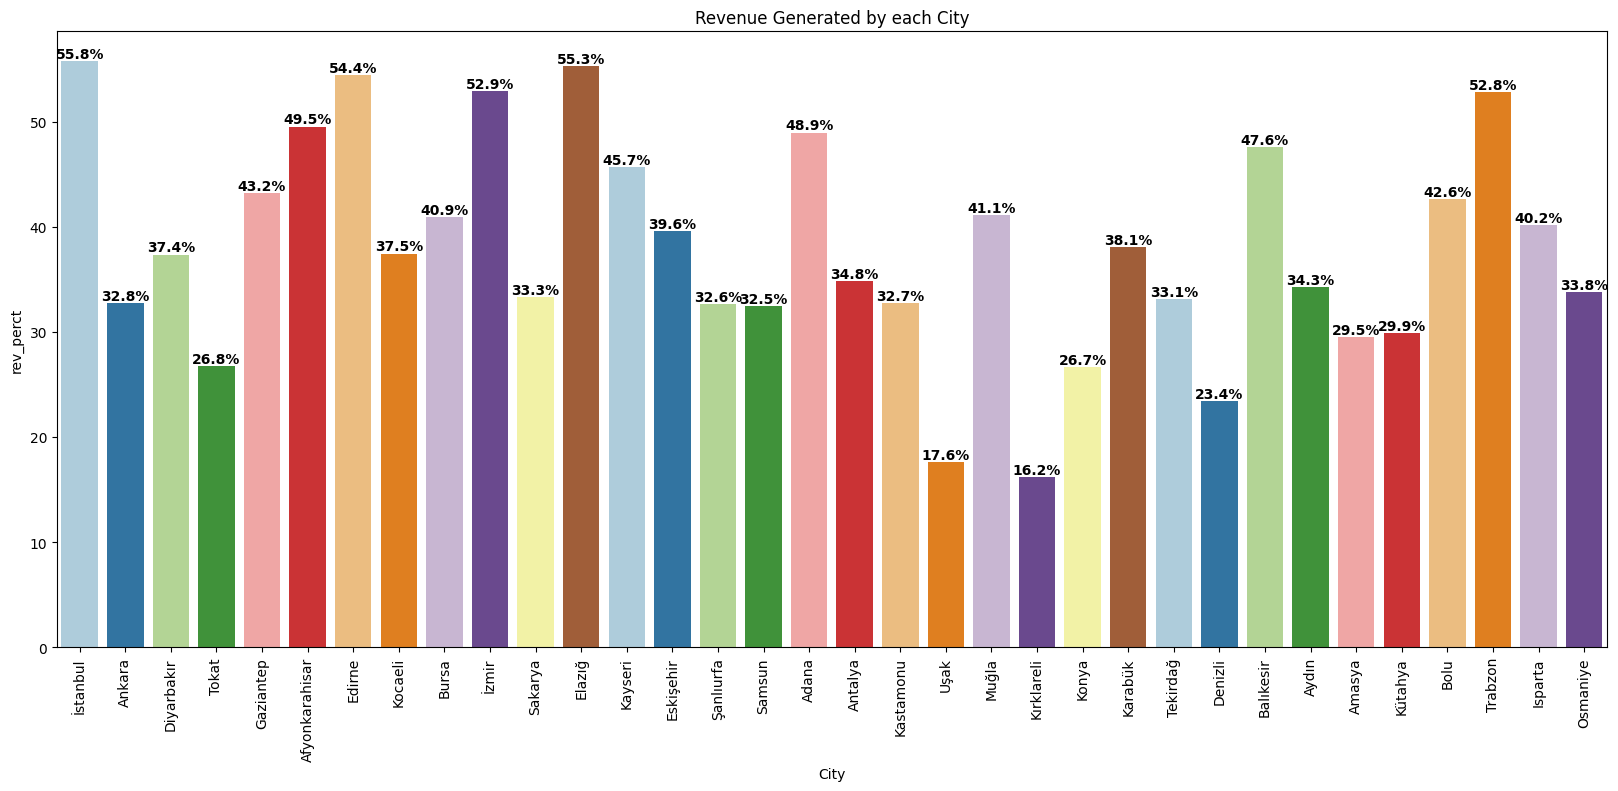

In [110]:
reference_value = 10000000  
df['rev_perct'] = ((df['revenue'] / reference_value) *100)
plt.figure(figsize=(20,8))
rev = sns.barplot(x= df["City"], y= df['rev_perct'], palette= "Paired", errorbar= None)
plt.title('Revenue Generated by each City')
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")
plt.xticks(rotation=90)
plt.show()


[Text(0, 0, '49.8%'), Text(0, 0, '37.5%')]

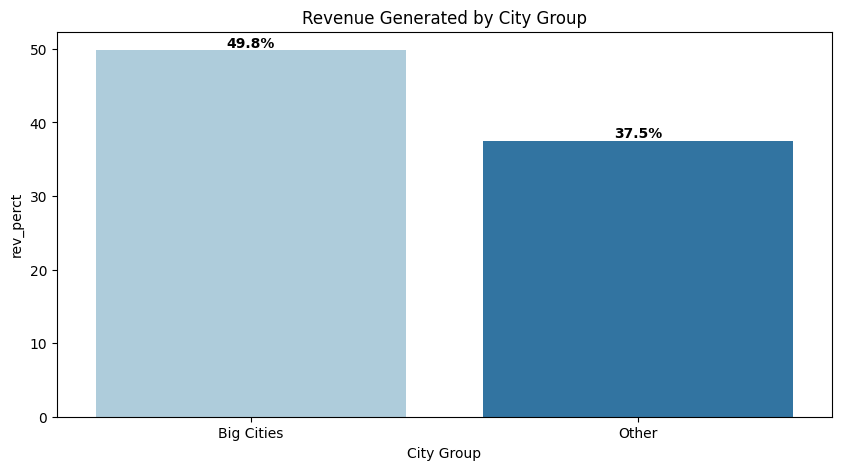

In [111]:
plt.figure(figsize=(10,5))
rev = sns.barplot(x= df["City Group"], y= df['rev_perct'], palette= "Paired", errorbar= None)
plt.title('Revenue Generated by City Group')
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")

[Text(0, 0, '41.7%'), Text(0, 0, '46.8%'), Text(0, 0, '38.1%')]

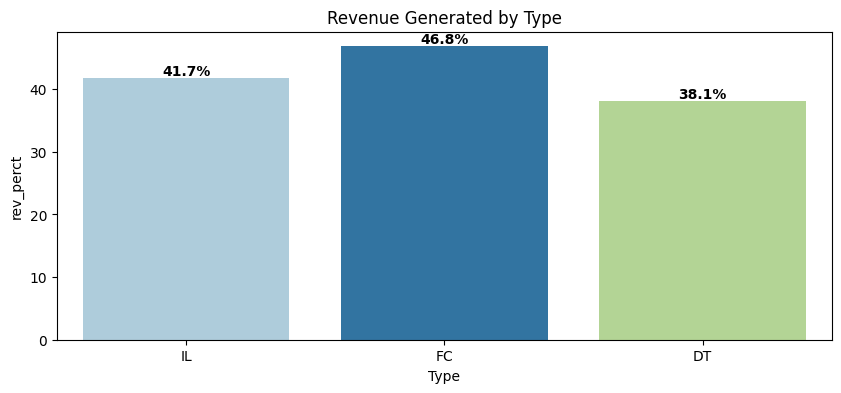

In [112]:
plt.figure(figsize=(10,4))
rev = sns.barplot(x= df["Type"], y= df['rev_perct'], palette= "Paired", errorbar= None)
plt.title('Revenue Generated by Type')
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")

In [88]:
#From the above value_counts it is concluded there is no unwanted strings present in datas like "?, /"

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [170]:
#Standardizing the input feature

X = df.drop(["City","City Group","Type","Open Date", "revenue", "rev_perct"], axis =1)
y= df["revenue"]
X.isna().sum()

X.dropna(inplace=True)
X.isna().sum()

P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
P12    0
P13    0
P14    0
P15    0
P16    0
P17    0
P18    0
P19    0
P20    0
P21    0
P22    0
P23    0
P24    0
P25    0
P26    0
P27    0
P28    0
P29    0
P30    0
P31    0
P32    0
P33    0
P34    0
P35    0
P36    0
P37    0
dtype: int64

In [171]:
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(X))
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.019293,0.401521,-0.303328,-0.375438,0.006313,-0.646620,-0.162125,-0.619746,-0.224363,-0.248181,...,-0.531518,-0.060076,0.390754,0.318396,0.295574,2.228104,0.481503,0.552454,0.204747,1.617868
1,0.019293,0.401521,-0.303328,-0.375438,-0.814419,-0.646620,-0.162125,-0.071671,-0.224363,-0.248181,...,-0.092805,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576
2,-0.697308,-0.276372,-2.250621,0.620621,0.006313,-0.166274,-0.162125,-0.071671,-0.224363,-0.248181,...,-0.970231,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576
3,0.735895,0.062575,1.643964,1.616680,1.647778,0.314073,2.033320,1.572552,2.580176,2.533155,...,-0.312161,2.643337,3.943065,2.979274,1.471837,2.809738,2.985316,2.850663,2.422837,2.739590
4,-0.339008,-0.276372,-1.276974,-0.375438,0.006313,-0.646620,-0.162125,-0.071671,-0.224363,-0.248181,...,-0.970231,-0.060076,0.390754,-0.272911,0.099530,0.483203,0.096301,0.552454,0.204747,1.057007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.697308,-0.954265,-1.276974,0.620621,1.647778,-0.646620,-0.601214,-0.619746,-0.785271,-0.804448,...,-0.531518,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576
126,0.019293,0.401521,-0.303328,-0.375438,0.006313,-0.166274,-0.162125,-0.619746,-0.785271,-0.248181,...,-0.092805,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576
127,-0.339008,-0.276372,-0.303328,-0.375438,0.006313,-0.166274,-0.162125,-0.071671,-0.224363,-0.248181,...,-0.531518,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576
128,0.019293,0.401521,-0.303328,0.620621,0.006313,-0.646620,-0.162125,-0.071671,-0.224363,-0.248181,...,-0.092805,-0.060076,-0.497323,-0.568564,-0.488602,-0.680064,-0.481503,-0.596650,-0.534617,-0.625576


In [190]:
#Determining the Principal Component

pca = PCA(n_components=3)
pca.fit(scaled_data)
principalComponents = pca.fit_transform(scaled_data)
principalDF = pd.DataFrame(data =principalComponents, columns=['PC1', 'PC2', 'PC3'] )

#Final DataFrame
finalDF = pd.concat([principalDF, df["revenue"]], axis = 1)
finalDF.head()

,PC1,PC2,PC3,revenue
0,0.863520,-2.072196,-0.223890,5653753
1,-2.519534,0.594331,0.141998,6923131
2,-3.060898,0.252656,-1.122772,2055379
3,10.923072,0.852884,-3.196320,2675511
4,-0.010751,-2.446937,-1.219860,4316715


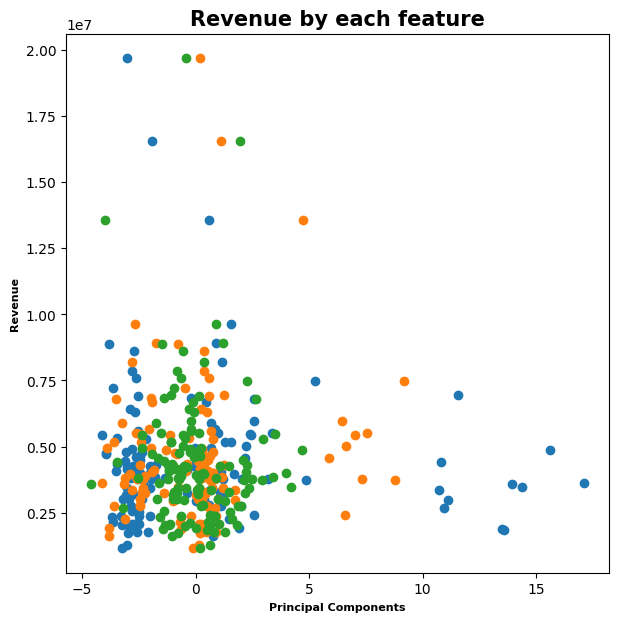

In [173]:
#visualization
fig =plt.figure(figsize = (7,7))


plt.scatter(finalDF["PC1"], finalDF["revenue"])

plt.scatter(finalDF["PC2"], finalDF["revenue"])
plt.scatter(finalDF["PC3"], finalDF["revenue"])

plt.xlabel("Principal Components", fontsize= 8, fontweight= "bold")
plt.ylabel("Revenue", fontsize= 8, fontweight= "bold")
plt.title('Revenue by each feature', fontsize= 15, fontweight= "bold")
plt.show()

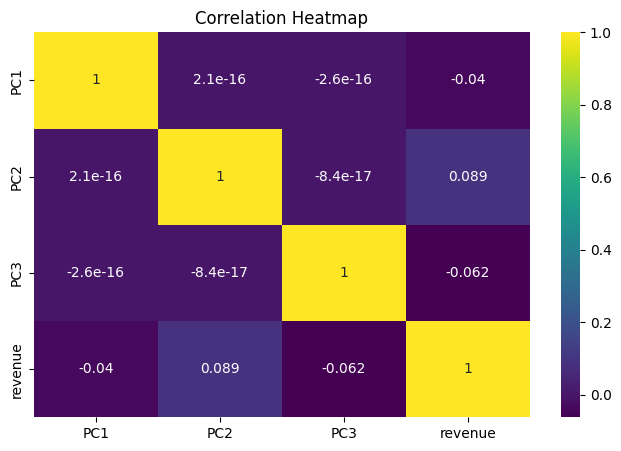

In [174]:
plt.figure(figsize=(8, 5))
sns.heatmap(finalDF.corr(), cmap='viridis', annot=True)

# Set a title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


In [161]:
#Revenue is not correlated with any indepentant feature so Linear function will not work well

# Model 1

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [193]:
finalDF.isna().sum()
finalDF.dropna(inplace=True)
finalDF.isna().sum()

PC1        0
PC2        0
PC3        0
revenue    0
dtype: int64

In [194]:
X = finalDF.drop("revenue", axis=1)
y= finalDF["revenue"]


In [195]:
#Train, Test, Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [230]:
de_reg = DecisionTreeRegressor(random_state=7)

#Training the model
de_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=7)

In [231]:
y_pred =de_reg.predict(X_test)
X_pred = de_reg.predict(X_train)

In [232]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold

In [201]:
r_score = r2_score(y_train, X_pred)
r_score

0.9996932513069712

In [233]:
r_score = r2_score(y_test, y_pred)
r_score

-3.5289137464586187

In [ ]:
#Actually its overfitting, giving best accuracy for training and less for testing data

In [ ]:
#GridSearch CV ->Hyper parameter Optimization

In [234]:
params = {'max_depth': range(1, 30)}
params

{'max_depth': range(1, 30)}

In [235]:
grid_search_cv= GridSearchCV(clf, params, cv=5, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': range(1, 30)}, verbose=1)

In [236]:
print(grid_search_cv.best_estimator_)

DecisionTreeRegressor(max_depth=1, random_state=7)


In [237]:
de_reg_opt = DecisionTreeRegressor(max_depth=1, random_state=7)
de_reg_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=7)

In [238]:
y_pred = de_reg_opt.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

-1.0574889011038433

# Model2

In [239]:
from sklearn.neighbors import KNeighborsRegressor

In [243]:
knn = KNeighborsRegressor()
params_knn={'n_neighbors':range(10,21)}

In [244]:
NN = GridSearchCV(knn, params_knn, 
                    cv=5, 
                   verbose=True)
NN.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 21)}, verbose=True)

In [246]:
mean_squared_error(NN.predict(X_train),y_train)

7088337365847.692

In [247]:
y_pred = NN.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

0.06843889101056422

# Model3

In [265]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
reg=RandomForestRegressor()

params_Rg={'n_estimators':range(10,100,10),'max_depth':range(10,21)}

In [251]:
rf= GridSearchCV(reg, params, 
                    cv=5, 
                   verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 30)}, verbose=True)

In [252]:
print(rf.best_estimator_)

RandomForestRegressor(max_depth=1)


In [253]:
rf_opt = RandomForestRegressor(max_depth=1)

rf_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=1)

In [254]:
y_pred = rf_opt.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

-0.39394856984470494

# Model 4

In [256]:
GBR=GradientBoostingRegressor()

params_GBR={'n_estimators':range(10,100,10),'max_depth':range(10,21),'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

In [257]:
gb= GridSearchCV(GBR, params, 
                    cv=5, 
                   verbose=True)
gb.fit(X_train, y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 30)}, verbose=True)

In [259]:
print(gb.best_estimator_)

GradientBoostingRegressor(max_depth=1)


In [261]:
gb_opt = GradientBoostingRegressor(max_depth=1)


gb_opt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1)

In [263]:
y_pred = gb_opt.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

-0.4633312004526078